Text(0.02, 0.5, 'Frame Number')

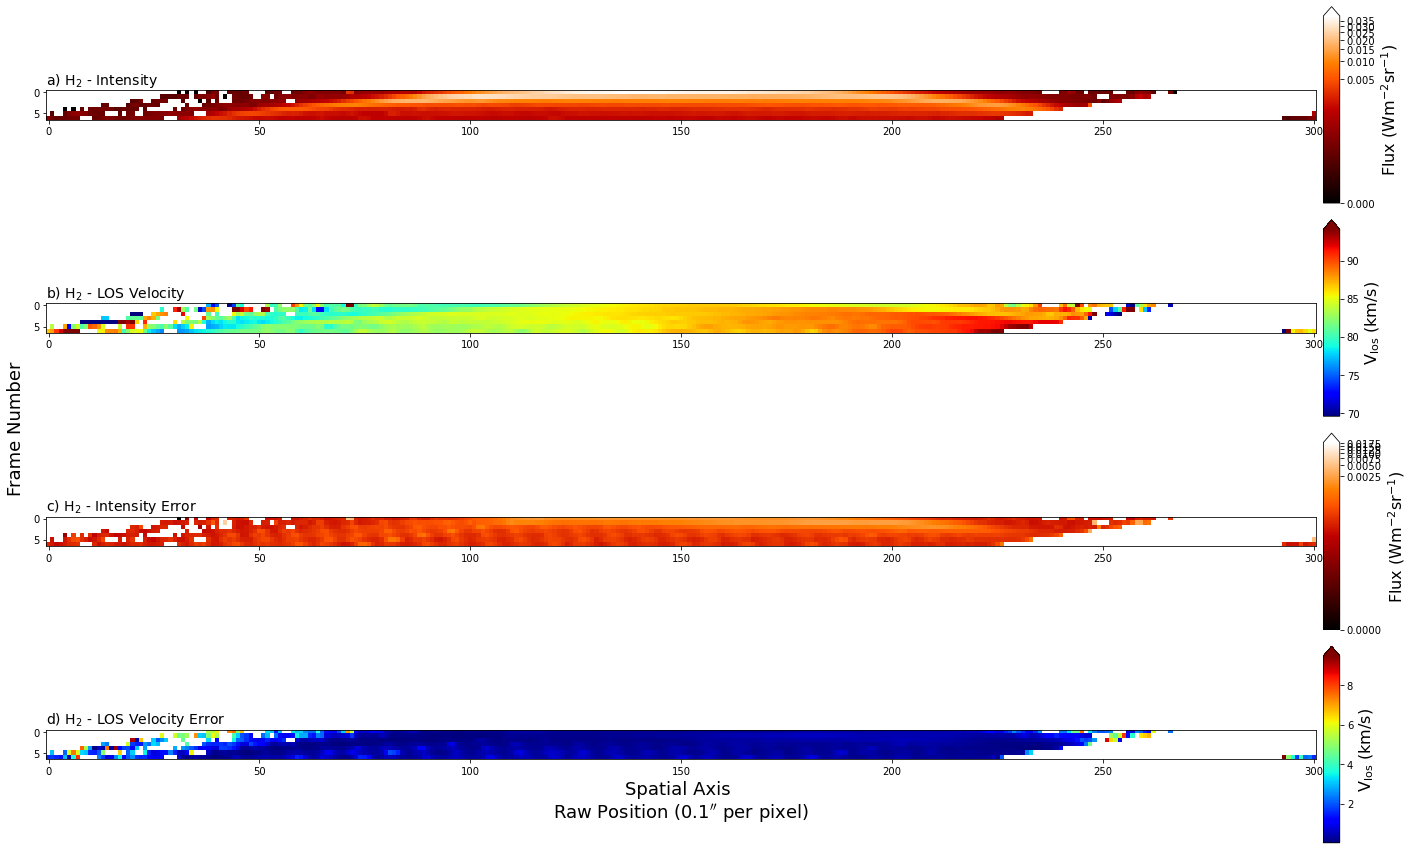

In [2]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model, fit_report
from lmfit.models import LinearModel


h2_int_shifted = fits.open('sh2_int_shifted.fits', ignore_missing_end=True)[0].data
h2_los_shifted = fits.open('sh2_los_shifted.fits', ignore_missing_end=True)[0].data
h2_int_shifted_error = fits.open('sh2_int_shifted_error.fits', ignore_missing_end=True)[0].data
h2_los_shifted_error = fits.open('sh2_los_shifted_error.fits', ignore_missing_end=True)[0].data

fig = plt.figure(figsize=(22,12), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h2_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_2$ - Intensity', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='Flux (Wm$^{-2}$sr$^{-1}$)',size=16)

fig.add_subplot(412)
plt.imshow(h2_los_shifted, cmap='jet')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_2$ - LOS Velocity', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=16)

fig.add_subplot(413)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h2_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_2$ - Intensity Error', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='Flux (Wm$^{-2}$sr$^{-1}$)',size=16)

fig.add_subplot(414)
plt.imshow(h2_los_shifted_error, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=14, alpha=0)
plt.title('d) H$_2$ - LOS Velocity Error', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=16)

# fig.supxlabel('my general x-label', fontsize=24)
fig.supylabel('Frame Number', fontsize=18)
# fig.suptitle('common', fontsize=24)

In [3]:
spatial_velocity2 = h2_int_shifted * np.nan

b_err = 0.10641512039513978

for i in range(np.size(spatial_velocity2, 1)):
# for i in range(1,2):
    for j in range(1, np.size(spatial_velocity2, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            a = h2_int_shifted[j-1][i] - h2_int_shifted_error[j-1][i]
            b = h2_int_shifted[j][i]
            c = h2_int_shifted[j+1][i] + h2_int_shifted_error[j-1][i]
            p = np.array((a, b, c))
            d = h2_int_shifted[j-1][i] + h2_int_shifted_error[j-1][i]
            e = h2_int_shifted[j][i]
            f = h2_int_shifted[j+1][i] - h2_int_shifted_error[j-1][i]
            q = np.array((d, e, f))
            l = h2_int_shifted[j-1][i]
            m = h2_int_shifted[j][i]
            n = h2_int_shifted[j+1][i]
            r = np.array((l, m, n))
#             print(j,i)
#             plt.figure()
#             plt.plot(y, p, 'k', label='original')
            f1 = sp.interpolate.interp1d(y,p)
            f2 = sp.interpolate.interp1d(y,q)
            f = sp.interpolate.interp1d(y,r)
            xnew = np.linspace(0,2,7)
#             plt.figure()
#             plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
#             print(f(xnew[2]), f(xnew[4]))
            p11 = f1(xnew[2])
            p31 = f1(xnew[4])
            p12 = f2(xnew[2])
            p32 = f2(xnew[4])
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di1 = (p31 - p11)/(p31 + p11)
            di2 = (p32 - p12)/(p32 + p12)
            di = (p3 - p1)/(p3 + p1)
            
#             print('di1 = '+str(di1))
#             print('di2 = '+str(di2))
            sig = (di1-di2)/2.
#             print('sig = '+str(sig))
            
            dv = 7.99*di
            dv_err = dv * np.sqrt((b_err/7.99)**2 + (sig/di)**2)
#             print('dv_err = '+str(dv_err))
#             print('dv = '+str(dv))
            if np.isreal(dv_err):
                spatial_velocity2[j,i] = dv_err
            

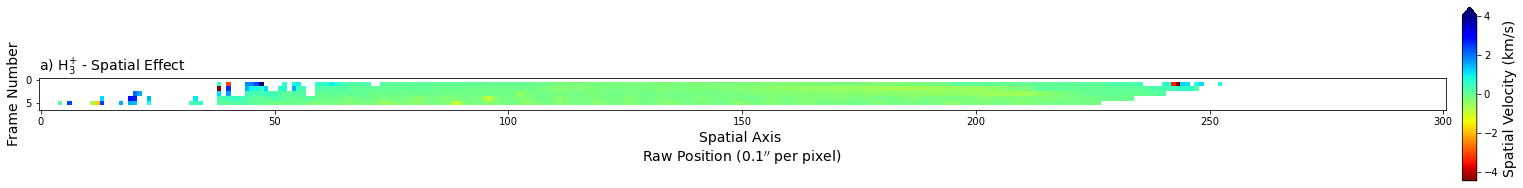

In [4]:
spatial_velocity2[spatial_velocity2 > 5] = np.nan
spatial_velocity2[spatial_velocity2 < -5] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity2, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

In [5]:
np.nanmin(spatial_velocity2)

-4.468179113586902

In [6]:
hdu = fits.PrimaryHDU(spatial_velocity2)
hdu.writeto('sh2_spat_err.fits', overwrite=True)